In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from scipy.stats import mannwhitneyu, chi2_contingency

All_proteins = pd.read_excel("dissertation_all_proteins.xlsx")
All_proteins

,UniProt_id,Is_TF,Entry_Name,DBD,Length_UniProt,Length_AlphaFold,AlphaFold_Species,AlphaFold_UniProt_id,AlphaFold_Entry_Name,AlphaFold_is_reference_proteome,...,C_IDR_length_over_10,Disordered_tail_N_or_C_presence,Disordered_tails_N_and_C_presence,n_IDR_pLDDT_mean,c_IDR_pLDDT_mean,number_of_dis_regions_over_10_res,disordered_regions,average_length_dis_region,longest_length_dis_region,shortest_length_dis_region
0,P05549,1,AP2A_HUMAN,AP-2,437,437,Homo sapiens,P05549,AP2A_HUMAN,1,...,22,1,1,43.393585,49.848571,3,"[53, 143, 22]",72.666667,143,22
1,Q92481,1,AP2B_HUMAN,AP-2,460,460,Homo sapiens,Q92481,AP2B_HUMAN,1,...,24,1,1,44.310152,48.026522,3,"[66, 150, 24]",80.000000,150,24
2,Q92754,1,AP2C_HUMAN,AP-2,450,450,Homo sapiens,Q92754,AP2C_HUMAN,1,...,21,1,1,43.309286,48.914500,3,"[56, 156, 21]",77.666667,156,21
3,Q7Z6R9,1,AP2D_HUMAN,AP-2,452,452,Homo sapiens,Q7Z6R9,AP2D_HUMAN,1,...,39,1,1,36.173382,45.194474,2,"[204, 39]",121.500000,204,39
4,Q6VUC0,1,AP2E_HUMAN,AP-2,442,442,Homo sapiens,Q6VUC0,AP2E_HUMAN,1,...,19,1,1,44.250588,49.855000,3,"[51, 155, 19]",75.000000,155,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20109,A0A0A0MTA7,0,TJB21_HUMAN,NaN,16,16,Homo sapiens,A0A0A0MTA7,TJB21_HUMAN,1,...,0,0,0,NaN,NaN,0,[],0.000000,0,0
20110,A0A0B4J200,0,TJB23_HUMAN,NaN,16,16,Homo sapiens,A0A0B4J200,TJB23_HUMAN,1,...,0,0,0,NaN,NaN,0,[],0.000000,0,0
20111,A0A0J9YWP8,0,TJB13_HUMAN,NaN,16,16,Homo sapiens,A0A0J9YWP8,TJB13_HUMAN,1,...,0,0,0,NaN,NaN,0,[],0.000000,0,0
20112,A0A0J9YXG5,0,TJB14_HUMAN,NaN,16,16,Homo sapiens,A0A0J9YXG5,TJB14_HUMAN,1,...,0,0,0,NaN,NaN,0,[],0.000000,0,0


In [72]:
All_proteins["longest_IDR_as_percentage_of_protein"] = (All_proteins["longest_length_dis_region"] / All_proteins["Length_AlphaFold"]) * 100

In [73]:
All_proteins.head(10)

,UniProt_id,Is_TF,Entry_Name,DBD,Length_UniProt,Length_AlphaFold,AlphaFold_Species,AlphaFold_UniProt_id,AlphaFold_Entry_Name,AlphaFold_is_reference_proteome,...,Disordered_tail_N_or_C_presence,Disordered_tails_N_and_C_presence,n_IDR_pLDDT_mean,c_IDR_pLDDT_mean,number_of_dis_regions_over_10_res,disordered_regions,average_length_dis_region,longest_length_dis_region,shortest_length_dis_region,longest_IDR_as_percentage_of_protein
0,P05549,1,AP2A_HUMAN,AP-2,437,437,Homo sapiens,P05549,AP2A_HUMAN,1,...,1,1,43.393585,49.848571,3,"[53, 143, 22]",72.666667,143,22,32.723112
1,Q92481,1,AP2B_HUMAN,AP-2,460,460,Homo sapiens,Q92481,AP2B_HUMAN,1,...,1,1,44.310152,48.026522,3,"[66, 150, 24]",80.000000,150,24,32.608696
2,Q92754,1,AP2C_HUMAN,AP-2,450,450,Homo sapiens,Q92754,AP2C_HUMAN,1,...,1,1,43.309286,48.914500,3,"[56, 156, 21]",77.666667,156,21,34.666667
3,Q7Z6R9,1,AP2D_HUMAN,AP-2,452,452,Homo sapiens,Q7Z6R9,AP2D_HUMAN,1,...,1,1,36.173382,45.194474,2,"[204, 39]",121.500000,204,39,45.132743
4,Q6VUC0,1,AP2E_HUMAN,AP-2,442,442,Homo sapiens,Q6VUC0,AP2E_HUMAN,1,...,1,1,44.250588,49.855000,3,"[51, 155, 19]",75.000000,155,19,35.067873
5,Q99856,1,ARI3A_HUMAN,ARID/BRIGHT,593,593,Homo sapiens,Q99856,ARI3A_HUMAN,1,...,1,0,NaN,46.860545,6,"[24, 156, 99, 20, 34, 56]",64.833333,156,20,26.306914
6,Q8IVW6,1,ARI3B_HUMAN,ARID/BRIGHT,561,561,Homo sapiens,Q8IVW6,ARI3B_HUMAN,1,...,1,0,NaN,46.065319,5,"[18, 154, 121, 36, 48]",75.400000,154,18,27.450980
7,A6NKF2,1,ARI3C_HUMAN,ARID/BRIGHT,412,412,Homo sapiens,A6NKF2,ARI3C_HUMAN,1,...,1,0,NaN,57.076087,4,"[90, 107, 33, 24]",63.500000,107,24,25.970874
8,Q03989,1,ARI5A_HUMAN,ARID/BRIGHT,594,594,Homo sapiens,Q03989,ARI5A_HUMAN,1,...,1,1,52.107872,48.177738,4,"[47, 106, 70, 253]",119.000000,253,47,42.592593
9,Q14865,1,ARI5B_HUMAN,ARID/BRIGHT,1188,1188,Homo sapiens,Q14865,ARI5B_HUMAN,1,...,1,0,NaN,37.143061,5,"[29, 24, 69, 276, 491]",177.800000,491,24,41.329966


In [74]:
All_proteins.to_excel("dissertation_all_proteins_IDR_as_%.xlsx")

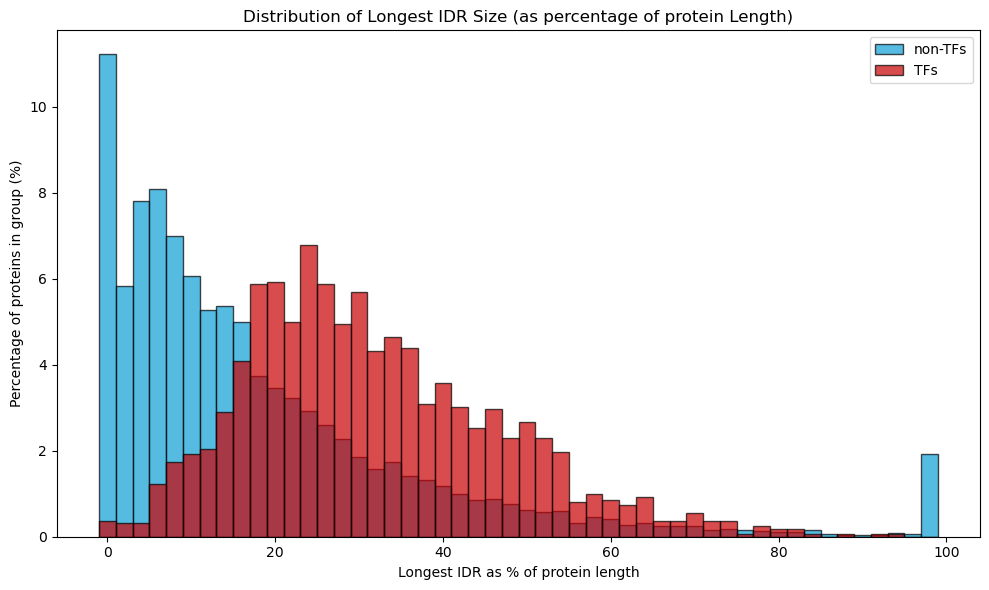

In [183]:
tf_color = "#CA0003"
non_tf_color = "#0F9ED5"

TF = all_metrics_all_proteins.loc[all_metrics_all_proteins["Is_TF"] == 1, "longest_IDR_as_percentage_of_protein"]
non_TF = all_metrics_all_proteins.loc[all_metrics_all_proteins["Is_TF"] == 0, "longest_IDR_as_percentage_of_protein"]
bins = np.arange(0, 101, 2)


array_TFs, bin_edges  = np.histogram(TF, bins=bins)
array_non_TFs, _  = np.histogram(non_TF, bins=bins)
positions = bin_edges[:-1] 

percentage_non_TF = array_non_TFs / array_non_TFs.sum() * 100
percentage_TF = array_TFs / array_TFs.sum() * 100

plt.figure(figsize=(10, 6))
plt.bar(positions, percentage_non_TF, 2, alpha=0.7, color=non_tf_color, label="non-TFs", edgecolor="black")
plt.bar(positions, percentage_TF, 2, alpha=0.7, color=tf_color, label="TFs", edgecolor="black")

plt.xlabel("Longest IDR as % of protein length")
plt.ylabel("Percentage of proteins in group (%)")
plt.title("Distribution of Longest IDR Size (as percentage of protein Length)")
plt.legend()
plt.tight_layout()
plt.show()




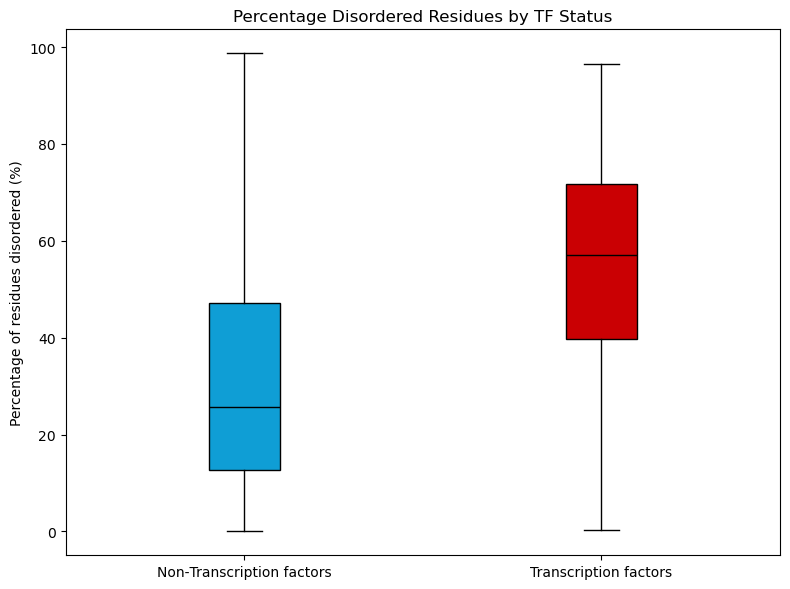

In [177]:
TF_values = All_proteins.loc[All_proteins["Is_TF"] == 1,"percent_disordered_res_for_entire_protein"]
non_TF_values = All_proteins.loc[All_proteins["Is_TF"] == 0, "percent_disordered_res_for_entire_protein"]

fig, ax = plt.subplots(figsize=(8, 6))

bp = ax.boxplot(
    [non_TF_values, TF_values],
    tick_labels=["Non‑Transcription factors", "Transcription factors"],
    patch_artist=True,
    boxprops=dict(linewidth=1),
    medianprops=dict(linewidth=1, color="black"),
    widths=0.2,
    showfliers=False
)

colours = ["#0F9ED5", "#CA0003"]
bp_boxes = bp["boxes"]
bp_boxes[0].set_facecolor(colours[0])
bp_boxes[1].set_facecolor(colours[1])


ax.set_title("Percentage Disordered Residues by TF Status")
ax.set_ylabel("Percentage of residues disordered (%)")


plt.tight_layout()
plt.show()


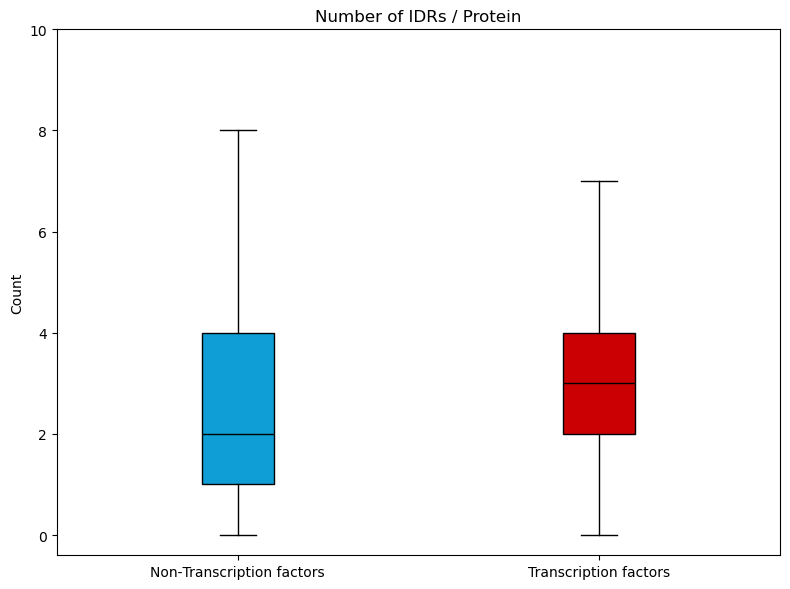

In [169]:
TF_values = All_proteins.loc[All_proteins["Is_TF"] == 1,"number_of_dis_regions_over_10_res"]
non_TF_values = All_proteins.loc[All_proteins["Is_TF"] == 0, "number_of_dis_regions_over_10_res"]

fig, ax = plt.subplots(figsize=(8, 6))

bp = ax.boxplot(
    [non_TF_values, TF_values],
    tick_labels=["Non‑Transcription factors", "Transcription factors"],
    patch_artist=True,
    boxprops=dict(linewidth=1),
    medianprops=dict(linewidth=1, color="black"),
    widths=0.2,
    showfliers=False
)

colours = ["#0F9ED5", "#CA0003"]
bp_boxes = bp["boxes"]
bp_boxes[0].set_facecolor(colours[0])
bp_boxes[1].set_facecolor(colours[1])


ax.set_title("Number of IDRs / Protein")
ax.set_ylabel("Count")
ax.set_ylim(top=10)



plt.tight_layout()
plt.show()


In [80]:
All_proteins["IDRs_per_100_residues"] = (
    All_proteins["number_of_dis_regions_over_10_res"] / All_proteins["Length_AlphaFold"]
) * 100
All_proteins

,UniProt_id,Is_TF,Entry_Name,DBD,Length_UniProt,Length_AlphaFold,AlphaFold_Species,AlphaFold_UniProt_id,AlphaFold_Entry_Name,AlphaFold_is_reference_proteome,...,Disordered_tails_N_and_C_presence,n_IDR_pLDDT_mean,c_IDR_pLDDT_mean,number_of_dis_regions_over_10_res,disordered_regions,average_length_dis_region,longest_length_dis_region,shortest_length_dis_region,longest_IDR_as_percentage_of_protein,IDRs_per_100_residues
0,P05549,1,AP2A_HUMAN,AP-2,437,437,Homo sapiens,P05549,AP2A_HUMAN,1,...,1,43.393585,49.848571,3,"[53, 143, 22]",72.666667,143,22,32.723112,0.686499
1,Q92481,1,AP2B_HUMAN,AP-2,460,460,Homo sapiens,Q92481,AP2B_HUMAN,1,...,1,44.310152,48.026522,3,"[66, 150, 24]",80.000000,150,24,32.608696,0.652174
2,Q92754,1,AP2C_HUMAN,AP-2,450,450,Homo sapiens,Q92754,AP2C_HUMAN,1,...,1,43.309286,48.914500,3,"[56, 156, 21]",77.666667,156,21,34.666667,0.666667
3,Q7Z6R9,1,AP2D_HUMAN,AP-2,452,452,Homo sapiens,Q7Z6R9,AP2D_HUMAN,1,...,1,36.173382,45.194474,2,"[204, 39]",121.500000,204,39,45.132743,0.442478
4,Q6VUC0,1,AP2E_HUMAN,AP-2,442,442,Homo sapiens,Q6VUC0,AP2E_HUMAN,1,...,1,44.250588,49.855000,3,"[51, 155, 19]",75.000000,155,19,35.067873,0.678733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20109,A0A0A0MTA7,0,TJB21_HUMAN,NaN,16,16,Homo sapiens,A0A0A0MTA7,TJB21_HUMAN,1,...,0,NaN,NaN,0,[],0.000000,0,0,0.000000,0.000000
20110,A0A0B4J200,0,TJB23_HUMAN,NaN,16,16,Homo sapiens,A0A0B4J200,TJB23_HUMAN,1,...,0,NaN,NaN,0,[],0.000000,0,0,0.000000,0.000000
20111,A0A0J9YWP8,0,TJB13_HUMAN,NaN,16,16,Homo sapiens,A0A0J9YWP8,TJB13_HUMAN,1,...,0,NaN,NaN,0,[],0.000000,0,0,0.000000,0.000000
20112,A0A0J9YXG5,0,TJB14_HUMAN,NaN,16,16,Homo sapiens,A0A0J9YXG5,TJB14_HUMAN,1,...,0,NaN,NaN,0,[],0.000000,0,0,0.000000,0.000000


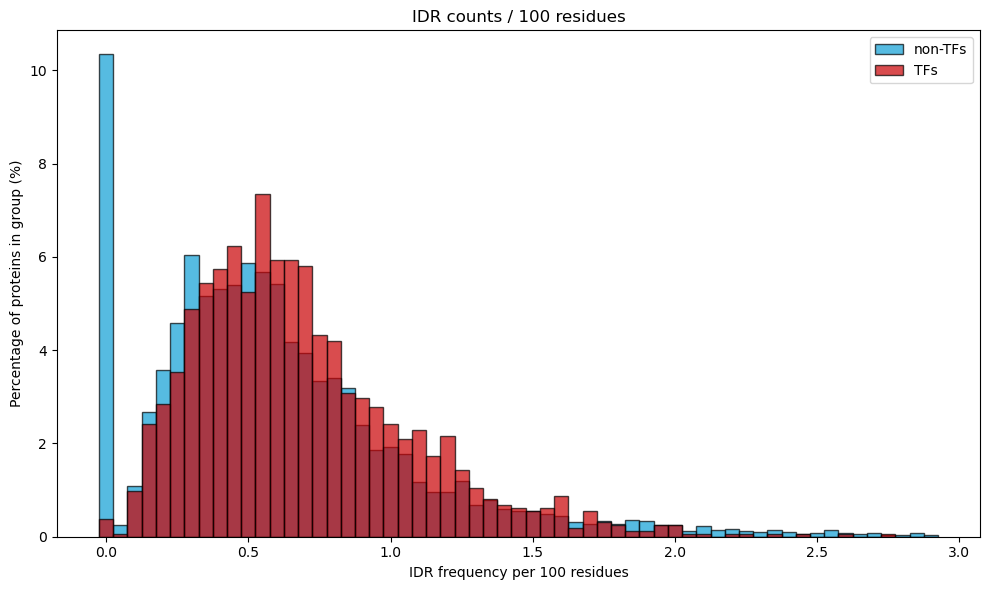

In [131]:
tf_color = "#CA0003"
non_tf_color = "#0F9ED5"


TF = all_metrics_all_proteins[all_metrics_all_proteins["Is_TF"] == 1]["IDRs_per_100_residues"]
non_TF = all_metrics_all_proteins[all_metrics_all_proteins["Is_TF"] == 0]["IDRs_per_100_residues"]
bins = np.arange(0, 3, 0.05)


array_TFs, bin_edges  = np.histogram(TF, bins=bins)
array_non_TFs, _  = np.histogram(non_TF, bins=bins)
positions = bin_edges[:-1] 

percentage_non_TF = array_non_TFs / array_non_TFs.sum() * 100
percentage_TF = array_TFs / array_TFs.sum() * 100

plt.figure(figsize=(10, 6))
plt.bar(positions, percentage_non_TF, 0.05, alpha=0.7, color=non_tf_color, label="non-TFs", edgecolor="black")
plt.bar(positions, percentage_TF, 0.05, alpha=0.7, color=tf_color, label="TFs", edgecolor="black")


plt.xlabel("IDR frequency per 100 residues")
plt.ylabel("Percentage of proteins in group (%)")
plt.title("IDR counts / 100 residues")
plt.legend()
plt.tight_layout()
plt.show()



In [86]:
All_proteins.to_excel("diss_IDR_per_100res.xlsx",index=False)

In [163]:
from scipy.stats import mannwhitneyu

tf_values = all_metrics_all_proteins.loc[all_metrics_all_proteins["Is_TF"] == 1, "IDRs_per_100_residues"].dropna()
non_tf_values = all_metrics_all_proteins.loc[all_metrics_all_proteins["Is_TF"] == 0, "IDRs_per_100_residues"].dropna()


_, p_value = mannwhitneyu(tf_values,
                          non_tf_values,
                          alternative="two-sided")



print(f"p-value = {p_value:.3e}")


p-value = 5.031e-26


In [88]:
All_proteins["Average_IDR_length_by_total_length_percentage"] = (All_proteins["average_length_dis_region"] / All_proteins["Length_AlphaFold"]) * 100
All_proteins

,UniProt_id,Is_TF,Entry_Name,DBD,Length_UniProt,Length_AlphaFold,AlphaFold_Species,AlphaFold_UniProt_id,AlphaFold_Entry_Name,AlphaFold_is_reference_proteome,...,n_IDR_pLDDT_mean,c_IDR_pLDDT_mean,number_of_dis_regions_over_10_res,disordered_regions,average_length_dis_region,longest_length_dis_region,shortest_length_dis_region,longest_IDR_as_percentage_of_protein,IDRs_per_100_residues,Average_IDR_length_by_total_length_percentage
0,P05549,1,AP2A_HUMAN,AP-2,437,437,Homo sapiens,P05549,AP2A_HUMAN,1,...,43.393585,49.848571,3,"[53, 143, 22]",72.666667,143,22,32.723112,0.686499,16.628528
1,Q92481,1,AP2B_HUMAN,AP-2,460,460,Homo sapiens,Q92481,AP2B_HUMAN,1,...,44.310152,48.026522,3,"[66, 150, 24]",80.000000,150,24,32.608696,0.652174,17.391304
2,Q92754,1,AP2C_HUMAN,AP-2,450,450,Homo sapiens,Q92754,AP2C_HUMAN,1,...,43.309286,48.914500,3,"[56, 156, 21]",77.666667,156,21,34.666667,0.666667,17.259259
3,Q7Z6R9,1,AP2D_HUMAN,AP-2,452,452,Homo sapiens,Q7Z6R9,AP2D_HUMAN,1,...,36.173382,45.194474,2,"[204, 39]",121.500000,204,39,45.132743,0.442478,26.880531
4,Q6VUC0,1,AP2E_HUMAN,AP-2,442,442,Homo sapiens,Q6VUC0,AP2E_HUMAN,1,...,44.250588,49.855000,3,"[51, 155, 19]",75.000000,155,19,35.067873,0.678733,16.968326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20109,A0A0A0MTA7,0,TJB21_HUMAN,NaN,16,16,Homo sapiens,A0A0A0MTA7,TJB21_HUMAN,1,...,NaN,NaN,0,[],0.000000,0,0,0.000000,0.000000,0.000000
20110,A0A0B4J200,0,TJB23_HUMAN,NaN,16,16,Homo sapiens,A0A0B4J200,TJB23_HUMAN,1,...,NaN,NaN,0,[],0.000000,0,0,0.000000,0.000000,0.000000
20111,A0A0J9YWP8,0,TJB13_HUMAN,NaN,16,16,Homo sapiens,A0A0J9YWP8,TJB13_HUMAN,1,...,NaN,NaN,0,[],0.000000,0,0,0.000000,0.000000,0.000000
20112,A0A0J9YXG5,0,TJB14_HUMAN,NaN,16,16,Homo sapiens,A0A0J9YXG5,TJB14_HUMAN,1,...,NaN,NaN,0,[],0.000000,0,0,0.000000,0.000000,0.000000


In [89]:
table = pd.crosstab(All_proteins["Is_TF"], All_proteins["Disordered_tail_N_or_C_presence"])
print(table)

Disordered_tail_N_or_C_presence     0      1
Is_TF                                       
0                                4435  14060
1                                 172   1447


In [90]:
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-squared:", chi2)
print("p-value:", p)

Chi-squared: 149.62154723713385
p-value: 2.0973995654873867e-34


In [91]:
freq_table = pd.crosstab(All_proteins["Is_TF"], All_proteins["Disordered_tail_N_or_C_presence"],normalize="index")
print(freq_table)

Disordered_tail_N_or_C_presence         0         1
Is_TF                                              
0                                0.239795  0.760205
1                                0.106238  0.893762


In [92]:
non_TFs_list = All_proteins.loc[All_proteins["Is_TF"] == 0]
len(non_TFs_list)

18495

In [93]:
len(non_TFs_list.loc[non_TFs_list["number_of_dis_regions_over_10_res"] != 0])

16592

In [15]:
16592 / 18495

0.8971073263044066